In [2]:
import numpy as np
import matplotlib.pyplot as pl

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 700

In [4]:
c = 3e8
G = 6.67e-11
pi = np.pi
const = 96/5*pi**(8/3)*(G/c**3)**(5/3)

Specific arguments

Generating signal and adding noise

In [5]:
# phi = -6*pi/5*f0*(1-8./3.*beta*t)**(5/8)/beta
# pl.plot(t, phi)

## Parameter space

In [6]:
def beta_calc(f, M):
    M_temp = M*2e30
    return const*f**(8/3)*M_temp**(5/3)

def beta_approx(f, M):
    return 3.7e-4*(M/1e-2)**(5/3)*(f/200)**(8/3)

In [7]:
fspace = np.linspace(20, 200, 1000)
Mspace = np.logspace(-5, -1, 1000)

[fgrid, Mgrid] = np.meshgrid(fspace, Mspace)
betaGrid = beta_calc(fgrid, Mgrid)
betaApprox = beta_approx(fgrid, Mgrid)
np.allclose(betaApprox, betaGrid)

False

Text(0, 0.5, 'log$_{10}(M_c/M_\\odot$)')

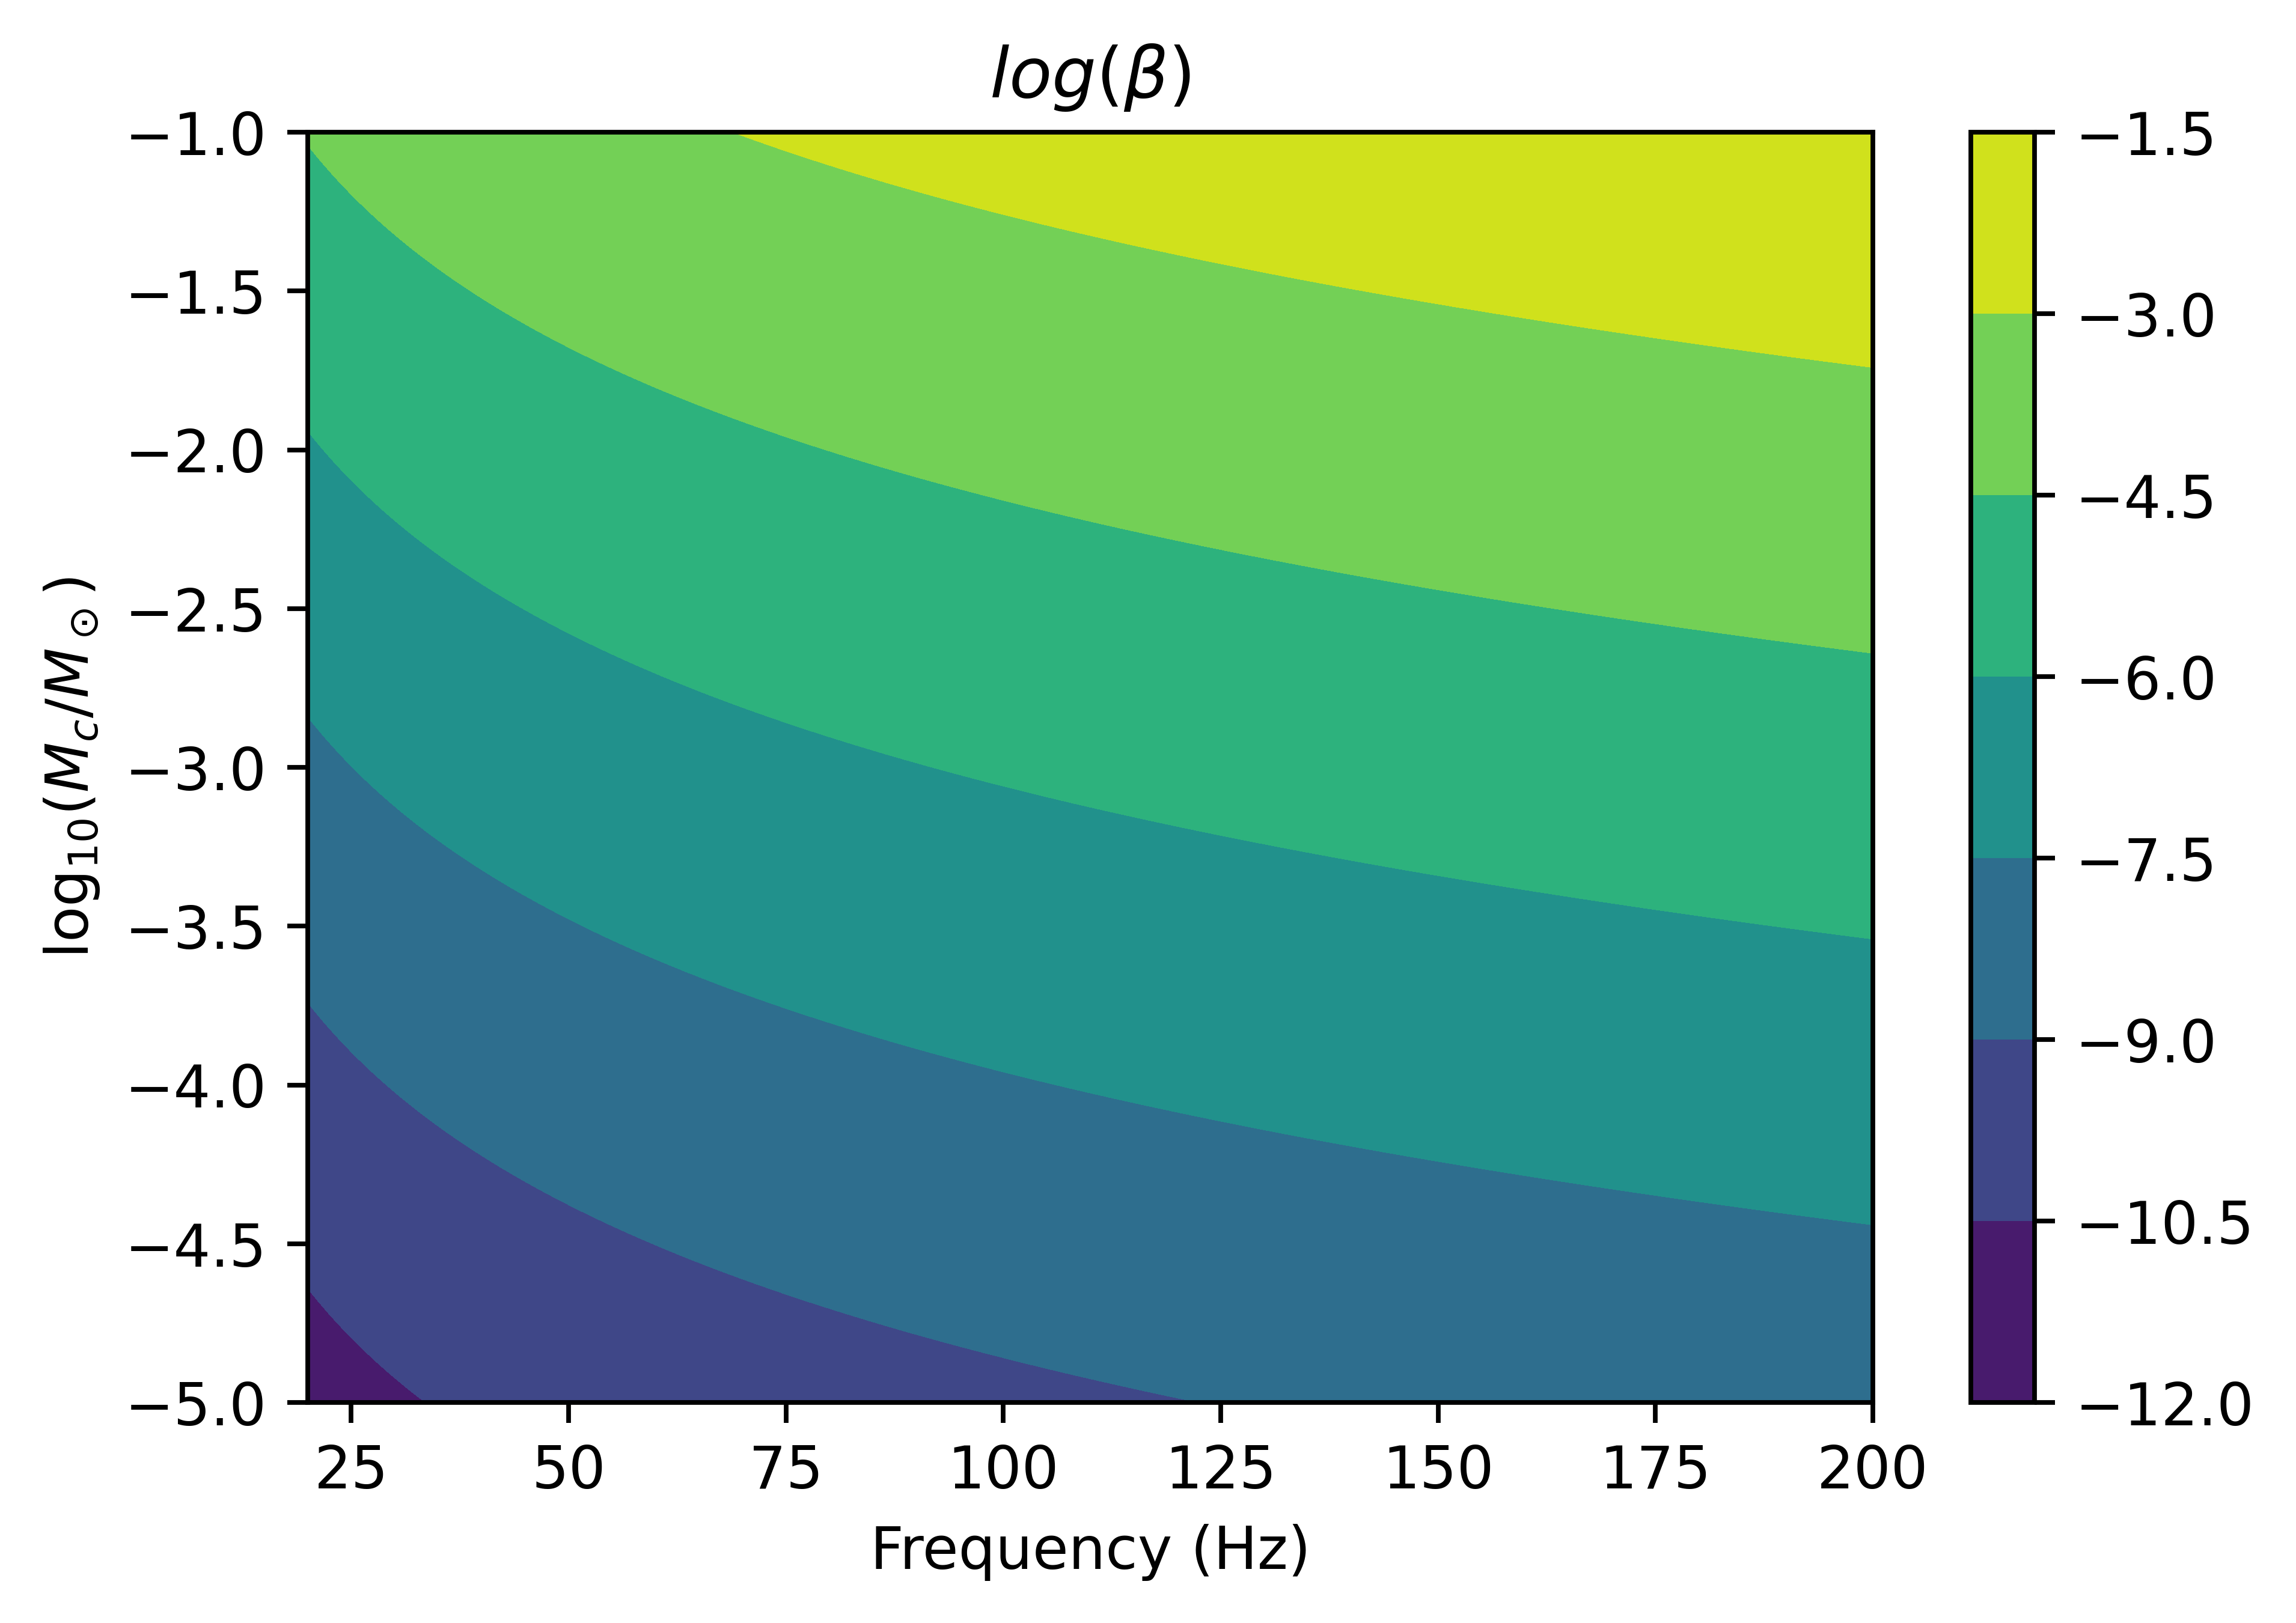

In [8]:
pl.contourf(fspace, np.log10(Mspace), np.log10(betaGrid))
pl.colorbar()
pl.title(r'$log(\beta)$')
pl.xlabel("Frequency (Hz)")
pl.ylabel(r'log$_{10}(M_c/M_\odot$)')

In [9]:
def t_max_calc(f0, M, f_max):
    temp0 = (M/1e-2)**(-5/3)
    temp1 = (f0/200)**(-8/3) - (f_max/200)**(-8/3)
    return 1013.75*temp0*temp1

def t_max_calc1(f0, beta, f_max):
    temp0 = 0.375/beta
    temp1 = 1-(f0/f_max)**(8/3)
    return temp0*temp1

In [10]:
np.allclose(t_max_calc(fgrid, Mgrid, 200), 
                   t_max_calc1(fgrid, betaGrid, 200))

True

In [11]:
tMax_grid = t_max_calc(fgrid, Mgrid, 2000)
# tMax_grid[tMax_grid>3e7] = 3e7

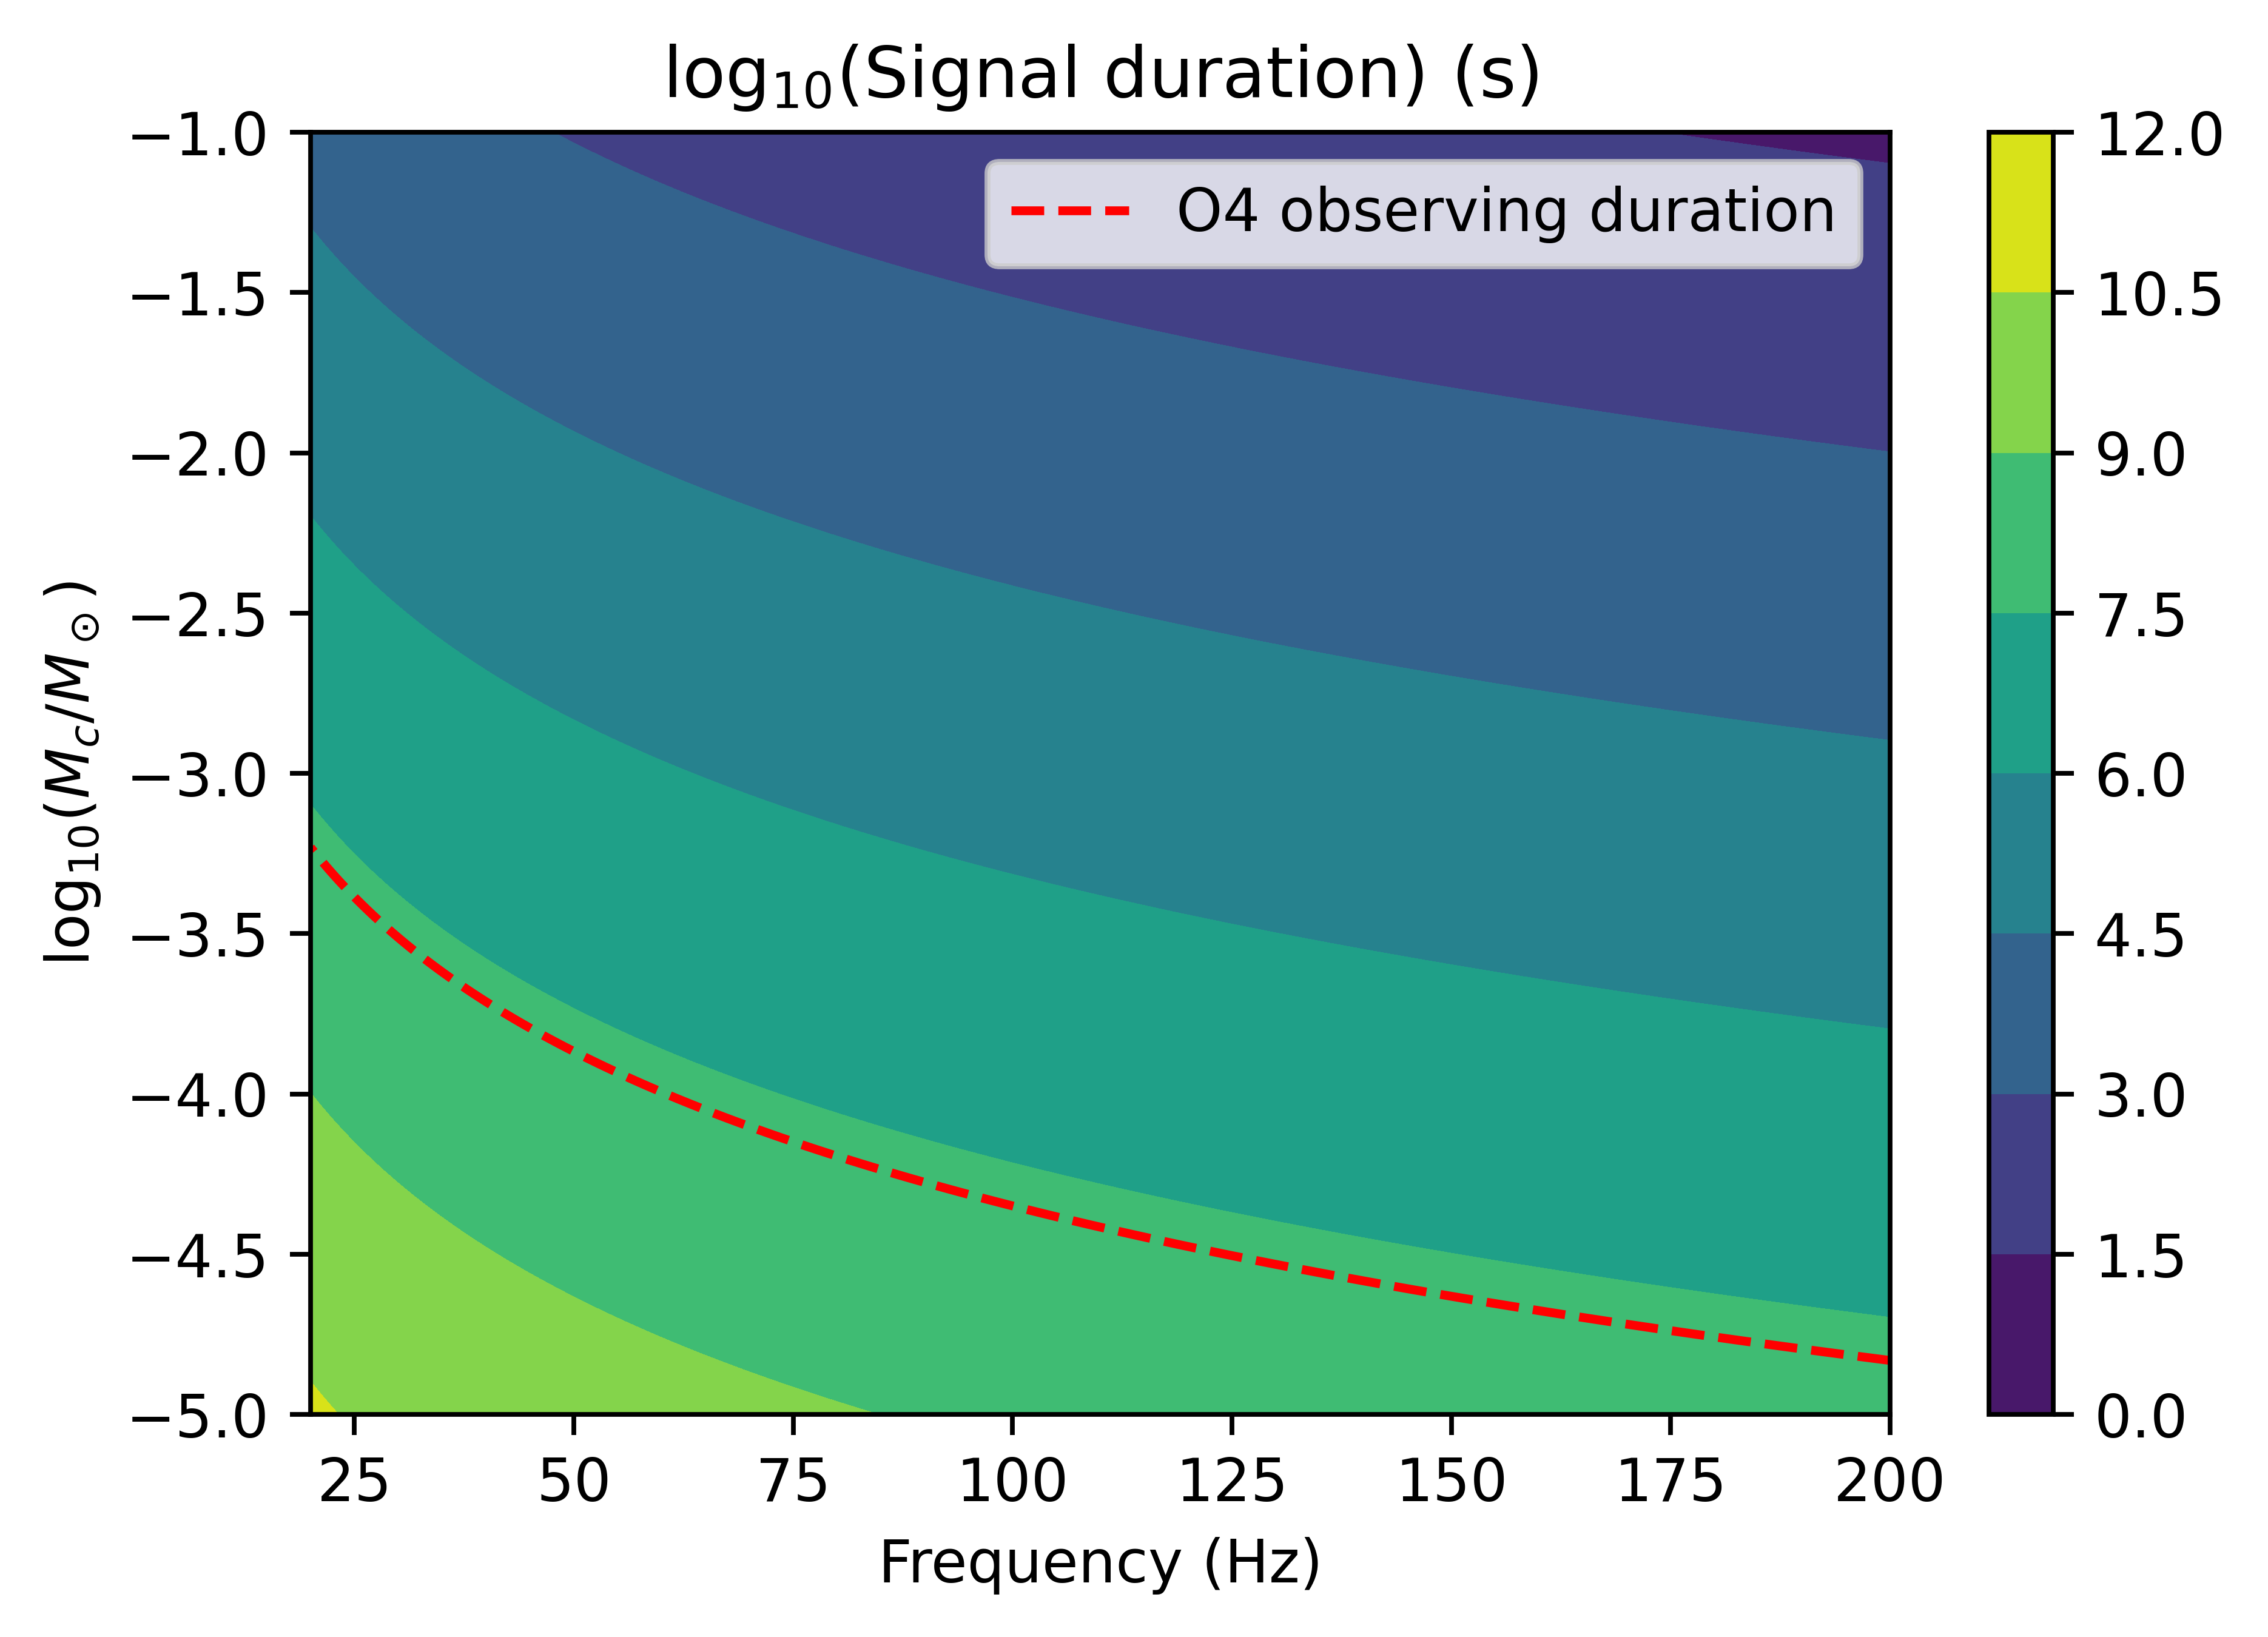

In [12]:
pl.contourf(fspace, np.log10(Mspace), np.log10(tMax_grid))
pl.colorbar()
pl.contour(fspace, np.log10(Mspace), np.log10(tMax_grid), [np.log10(5.3e7)], colors = 'red', linestyles = '--')
pl.title(r'$\log_{10}$(Signal duration) (s)')
pl.xlabel("Frequency (Hz)")
pl.ylabel(r'log$_{10}(M_c/M_\odot$)')

from matplotlib.lines import Line2D
line = Line2D([0], [0], label='O4 observing duration', color='r', ls = '--')
pl.legend(handles = [line])
# pl.savefig("Signal_duration", format = "jpeg")

In [12]:
def f_calc(f0, t, beta):
    return f0*np.power(1-8/3*beta*t,-3/8)

In [13]:
fMax_grid = f_calc(fgrid, tMax_grid, betaGrid)

Text(0, 0.5, '$M_c$ ($M_\\odot$)')

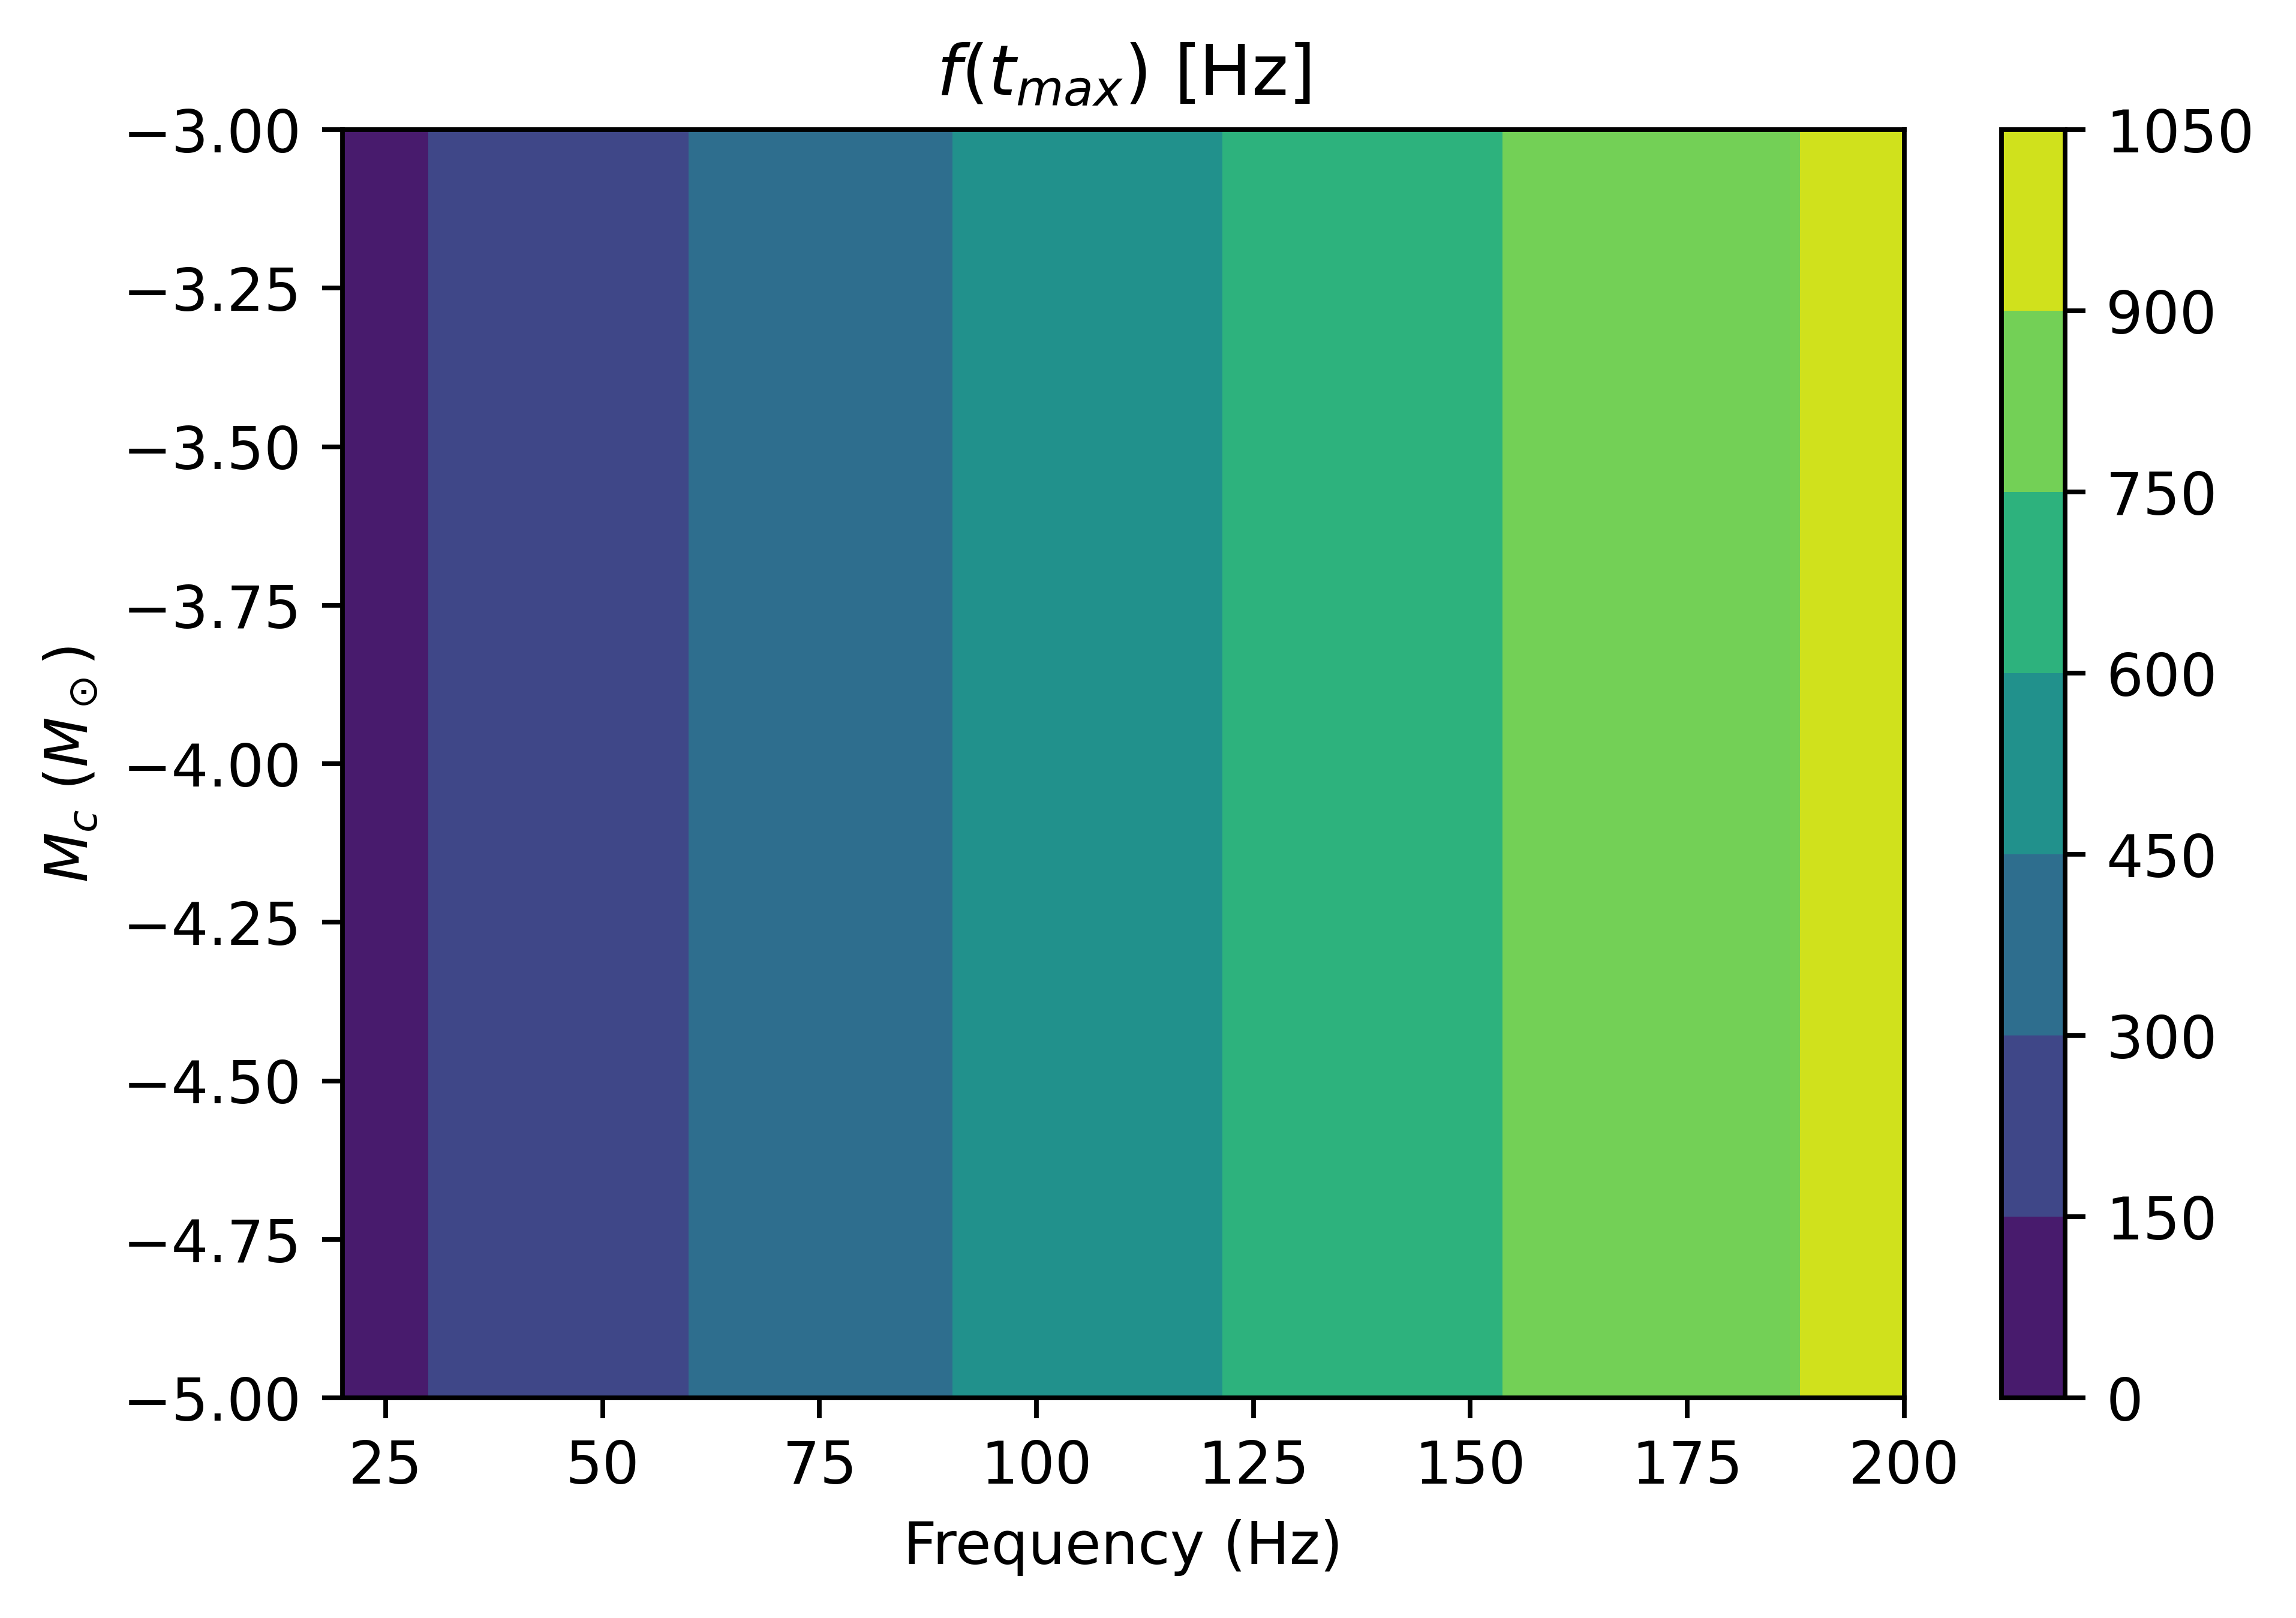

In [14]:
pl.contourf(fspace, np.log10(Mspace), fMax_grid)
pl.colorbar()
pl.title(r'$f(t_{max})$ [Hz]')
pl.xlabel("Frequency (Hz)")
pl.ylabel(r'log$_{10}(M_c/M_\odot$)')

Text(0, 0.5, '$M_c$ ($M_\\odot$)')

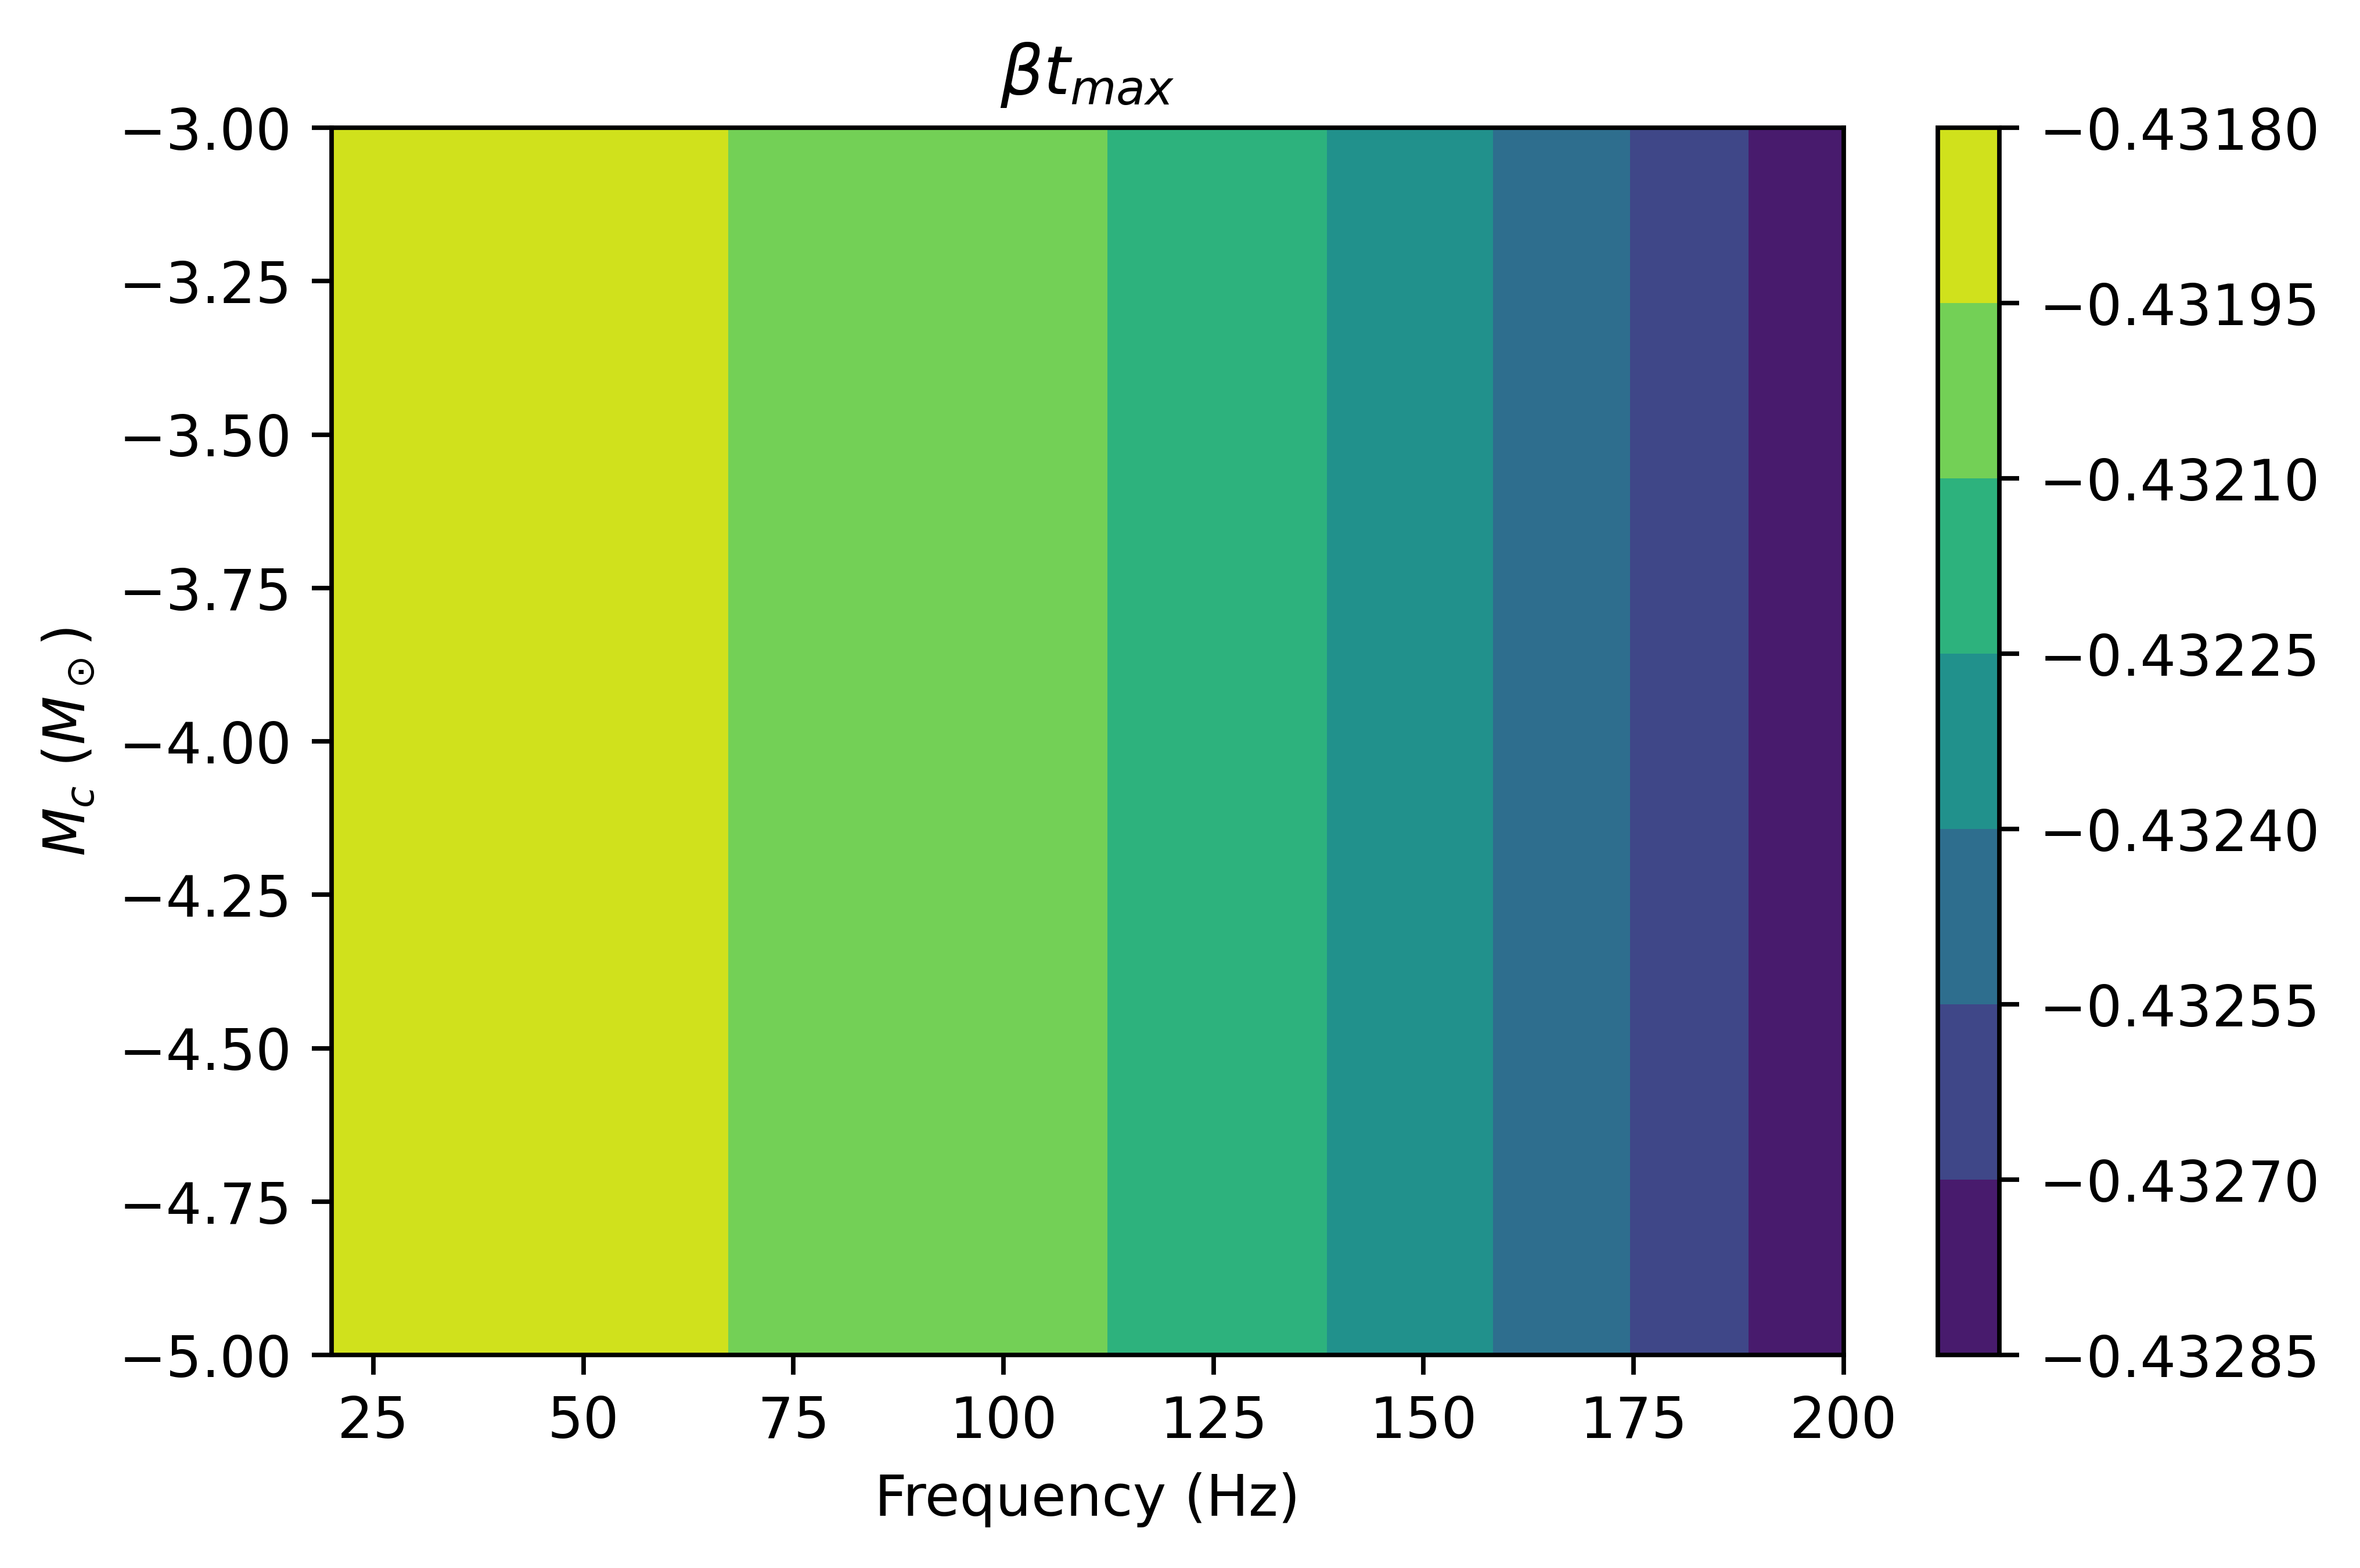

In [15]:
pl.contourf(fspace, np.log10(Mspace), np.log10(tMax_grid*betaGrid))
pl.colorbar()
pl.title(r'$\beta t_{max}$')
pl.xlabel("Frequency (Hz)")
pl.ylabel(r'log$_{10}(M_c/M_\odot$)')

In [16]:
tMax_grid1 = t_max_calc1(fgrid, betaGrid, 2000)
tMax_grid1[tMax_grid1>3e7] = 3e7

Text(0, 0.5, '$M_c$ ($M_\\odot$)')

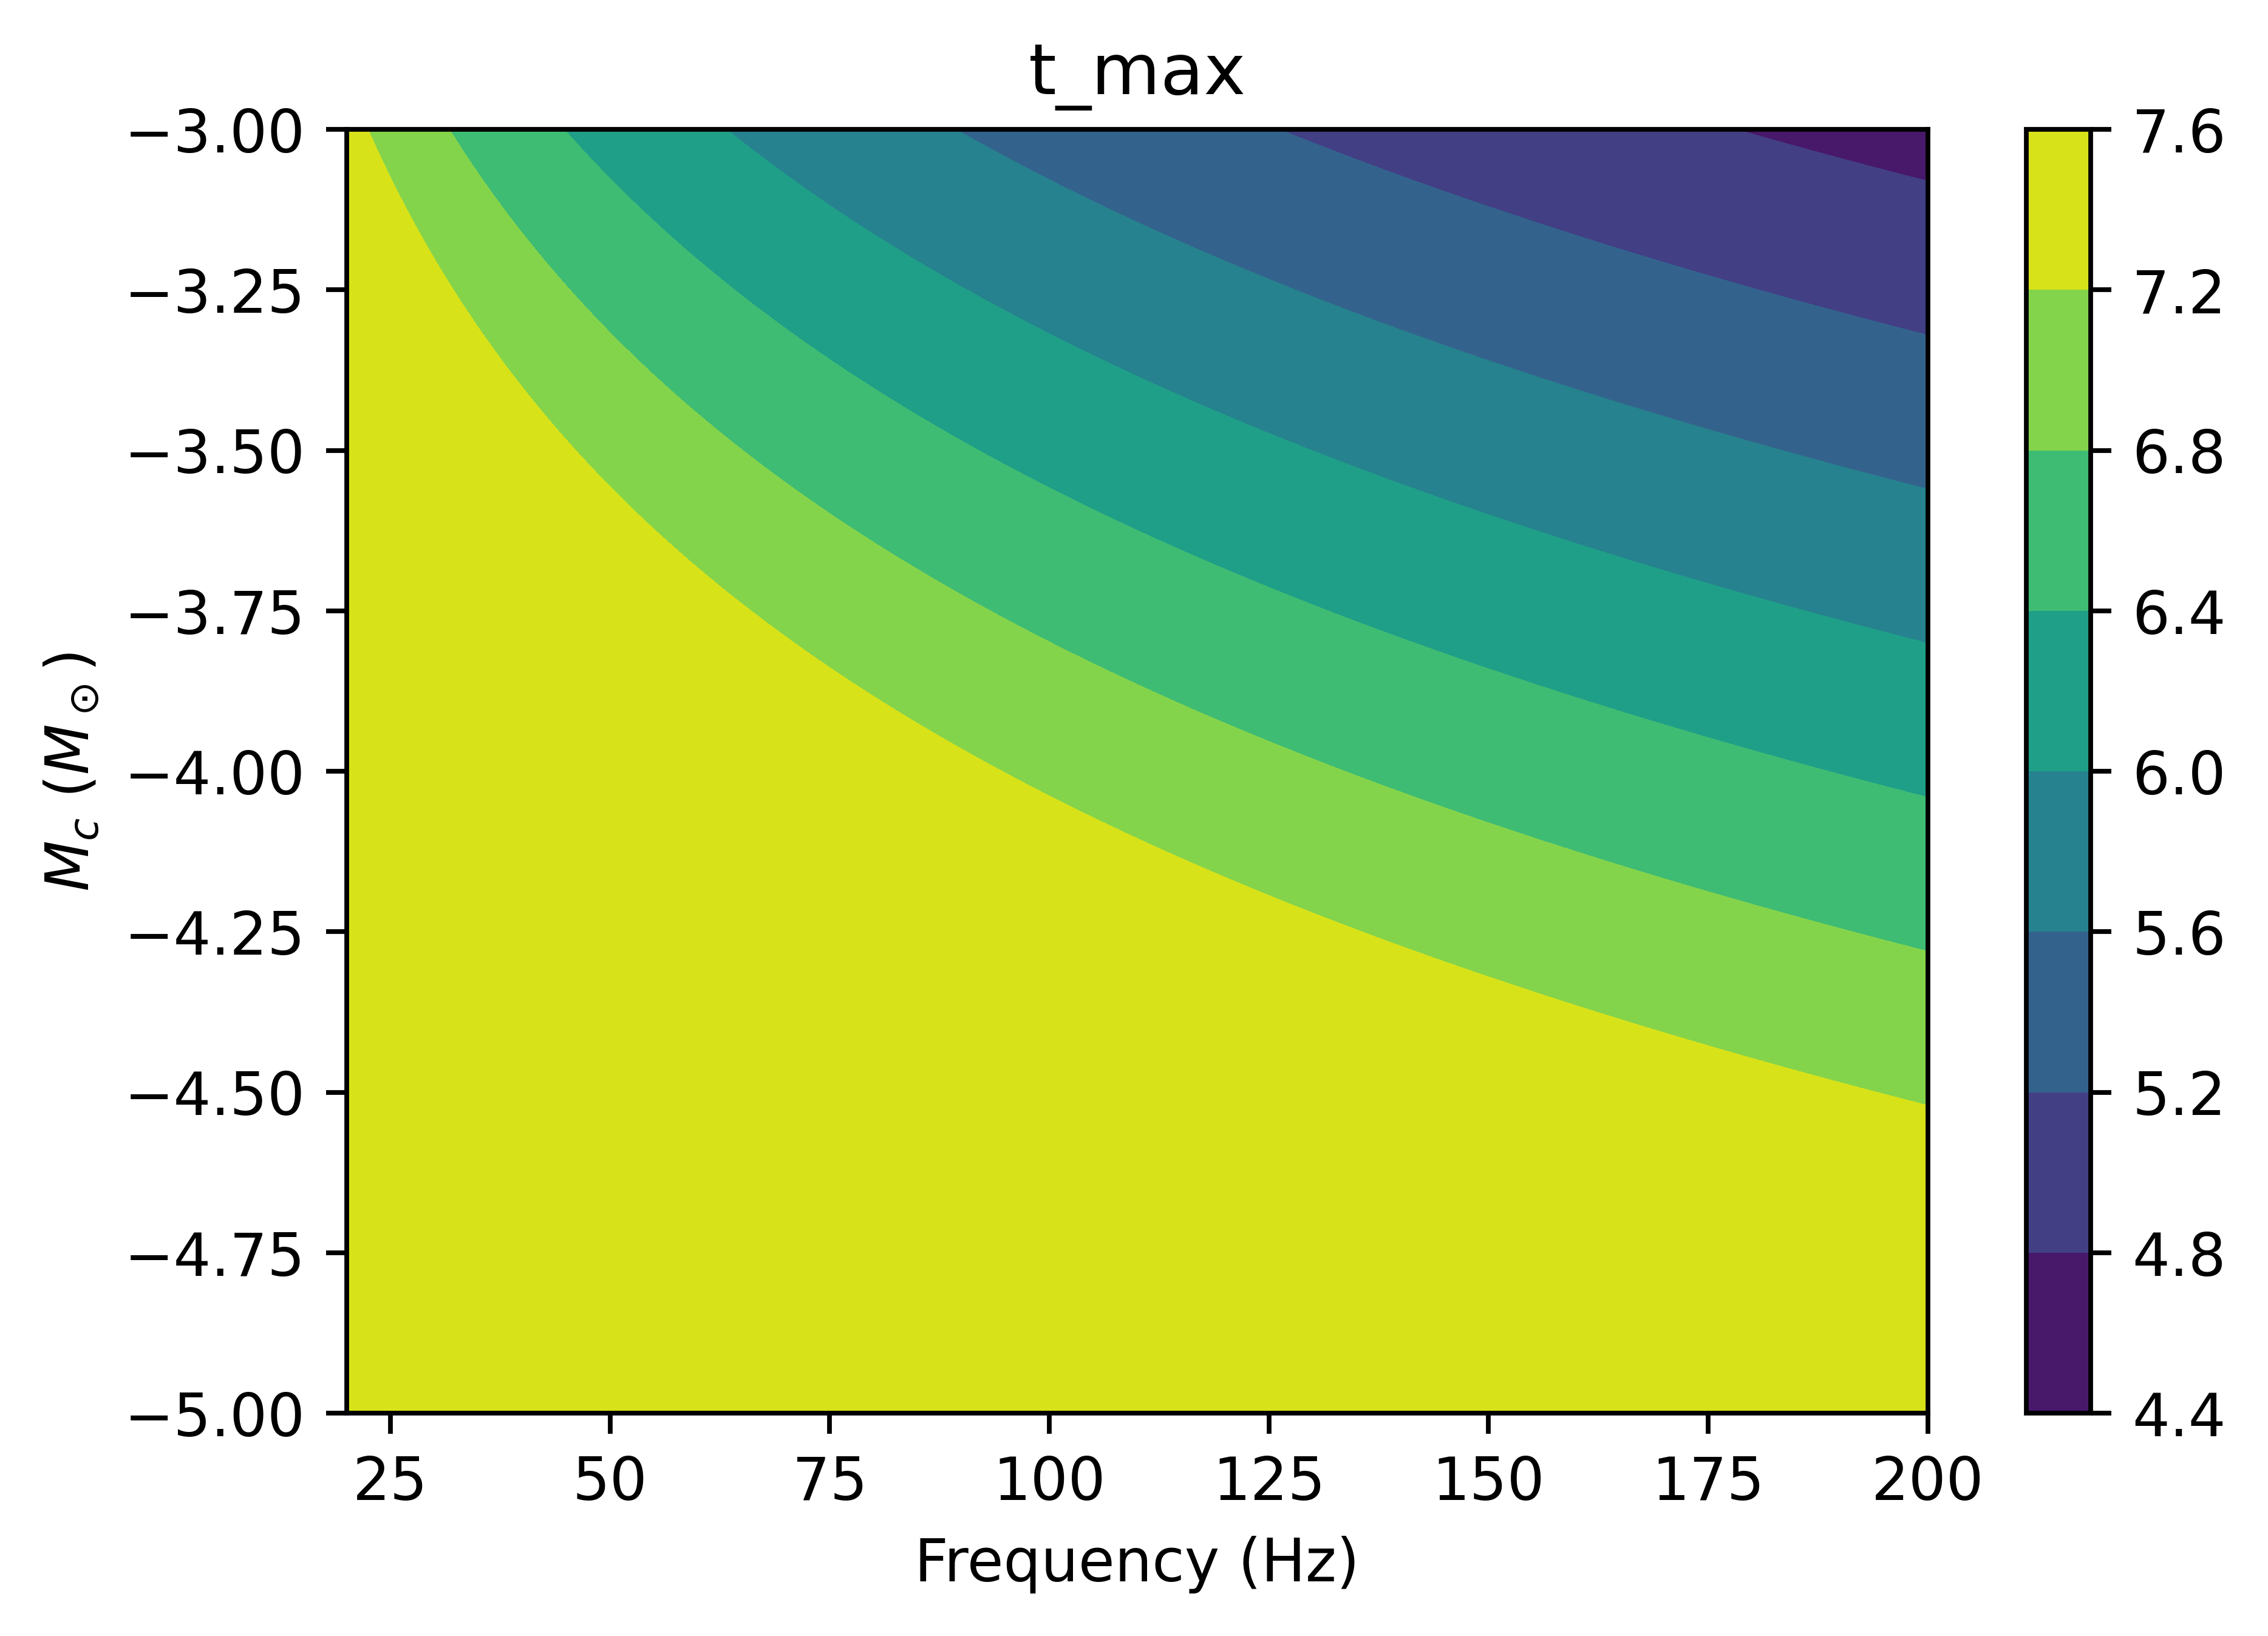

In [17]:
pl.contourf(fspace, np.log10(Mspace), np.log10(tMax_grid1))
pl.colorbar()
pl.title("t_max")
pl.xlabel("Frequency (Hz)")
pl.ylabel(r'log$_{10}(M_c/M_\odot$)')

In [18]:
beta_space = np.logspace(-12, -1, 1000)
beta_small = 1e-7
beta_big = 1e-6
t_space = np.linspace(0, 1e4, int(1e3))
t_new_big = (1-8/3*beta_big*t_space)**(5/8)/beta_big
t_new_small = (1-8/3*beta_small*t_space)**(5/8)/beta_small